In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('Project_Attrition.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
Attrition_Rate=df.Attrition.value_counts()/len(df)*100
Attrition_Rate

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

In [9]:
 df.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis = 1, inplace = True)

In [10]:
categorical_col = []
for col in df.columns:
    if df[col].dtype == object and len(df[col].unique()) <=50:
        categorical_col.append(col)
        print(f"{col} : {df[col].unique()}")
        print("~~~~~~~~~~~~~~~~~~~~~~")

Attrition : ['Yes' 'No']
~~~~~~~~~~~~~~~~~~~~~~
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
~~~~~~~~~~~~~~~~~~~~~~
Department : ['Sales' 'Research & Development' 'Human Resources']
~~~~~~~~~~~~~~~~~~~~~~
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
~~~~~~~~~~~~~~~~~~~~~~
Gender : ['Female' 'Male']
~~~~~~~~~~~~~~~~~~~~~~
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
~~~~~~~~~~~~~~~~~~~~~~
MaritalStatus : ['Single' 'Married' 'Divorced']
~~~~~~~~~~~~~~~~~~~~~~
OverTime : ['Yes' 'No']
~~~~~~~~~~~~~~~~~~~~~~


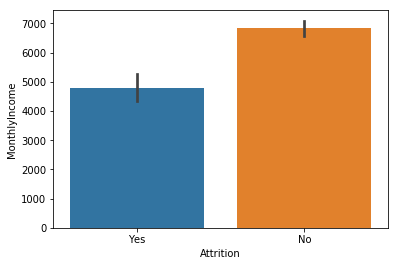

In [11]:
sns.barplot(x='Attrition', y='MonthlyIncome', data=df)

In [12]:
df['IncomeRange'] = pd.cut(df['MonthlyIncome'], [1000, 5000, 10000, 15000,20000])

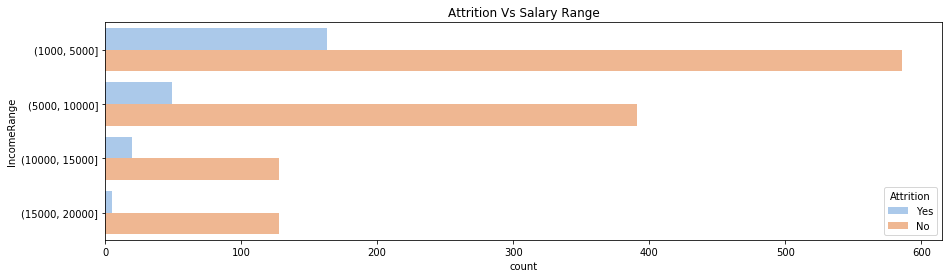

In [13]:
plt.figure(figsize = (15,4))
sns.countplot(y='IncomeRange', hue = 'Attrition', data =df, palette = 'pastel')
plt.title('Attrition Vs Salary Range')
plt.show()

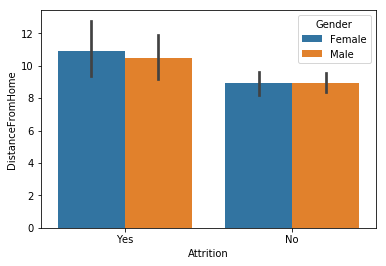

<Figure size 720x720 with 0 Axes>

In [14]:
sns.barplot(x='Attrition', y='DistanceFromHome', hue='Gender', data=df)
plt.figure(figsize=(10,10))
plt.show()

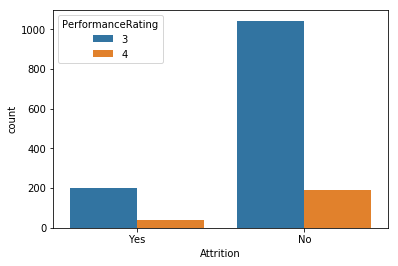

<Figure size 720x720 with 0 Axes>

In [15]:
sns.countplot(x='Attrition', hue = 'PerformanceRating', data = df)
plt.figure(figsize=(10,10))
plt.show()

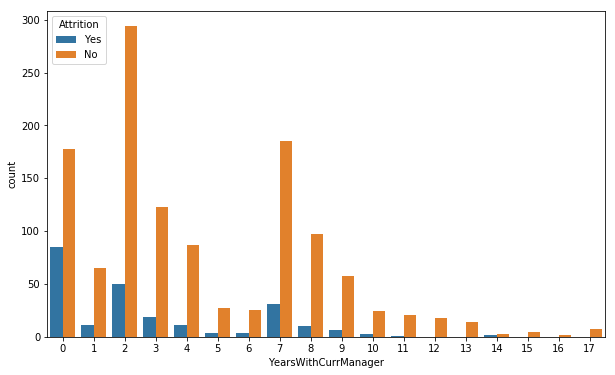

In [16]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager',hue='Attrition',data=df)
plt.show()

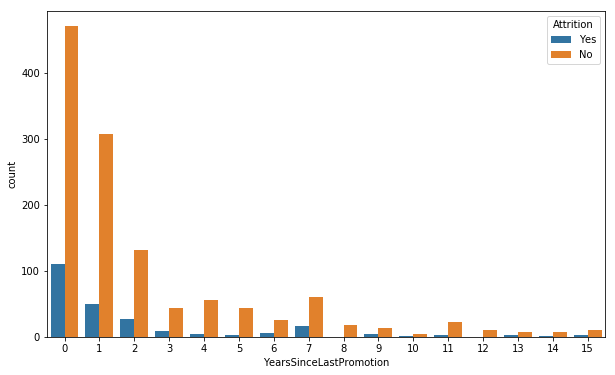

In [17]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=df)
plt.show()

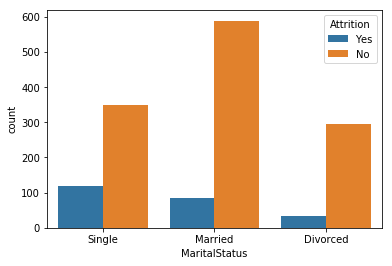

In [18]:
sns.countplot(x='MaritalStatus',hue = 'Attrition' ,data=df)

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

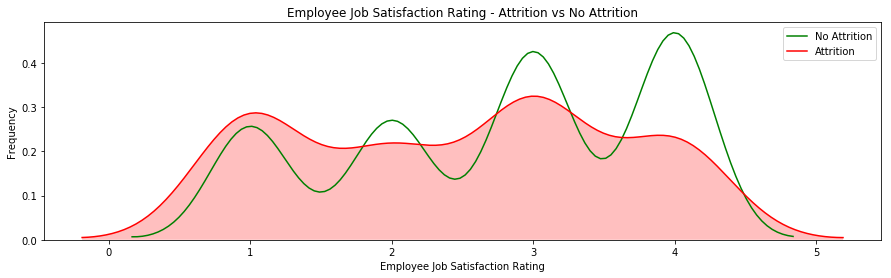

In [19]:
plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Attrition']=='No'),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
sns.kdeplot(df.loc[(df['Attrition']=='Yes'),'JobSatisfaction'],color='r',shade=True,label='Attrition')
plt.xlabel('Employee Job Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

Text(0.5, 1.0, 'Relationship Satisfaction Rating - Attrition vs No Attrition')

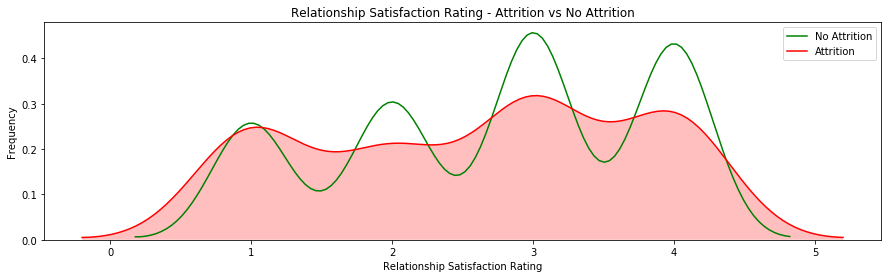

In [20]:
plt.figure(figsize=(15,4))
sns.kdeplot(df.loc[(df['Attrition']=='No'),'RelationshipSatisfaction'],color='g',shade=False,label='No Attrition')
sns.kdeplot(df.loc[(df['Attrition']=='Yes'),'RelationshipSatisfaction'],color='r',shade=True,label='Attrition')
plt.xlabel('Relationship Satisfaction Rating')
plt.ylabel('Frequency')
plt.title('Relationship Satisfaction Rating - Attrition vs No Attrition')

In [21]:
df['Attrition'] = df['Attrition'].replace(['Yes','No'], [1,0])  

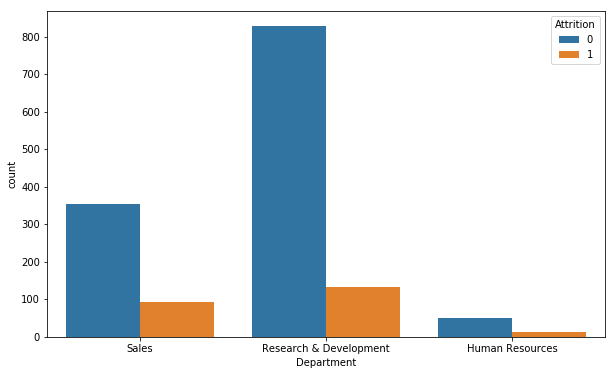

In [22]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='Department',hue='Attrition',data=df)
plt.show()

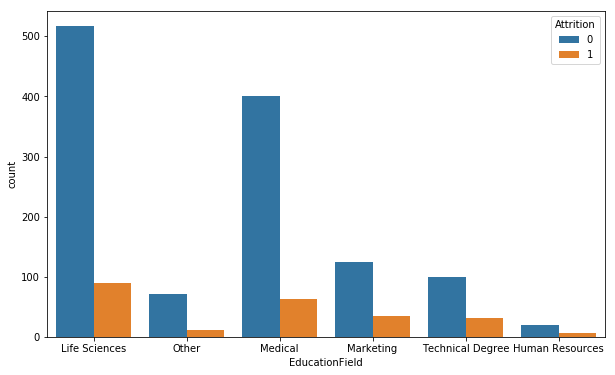

In [23]:
fig=plt.figure(figsize=(10,6))
sns.countplot(x='EducationField',hue='Attrition',data=df)
plt.show()

In [24]:
df['BusinessTravel'] = df['BusinessTravel'].replace(['Travel_Rarely', 'Travel_Frequently' ,'Non-Travel'],[0,1,2])
df['Department'] = df['Department'].replace(['Sales', 'Research & Development' ,'Human Resources'], [0,1,2])
df['Gender'] = df['Gender'].replace(['Male','Female'], [1,0])
df['EducationField'] = df['EducationField'].replace(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree',
 'Human Resources', 'Other'],[0,1,2,3,4,5])

In [25]:
df['MaritalStatus'] = df['MaritalStatus'].replace(['Single' ,'Married' ,'Divorced'],[0,1,2])

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeRange
0,41,1,0,1102,0,1,2,0,2,0,...,1,0,8,0,1,6,4,0,5,"(5000, 10000]"
1,49,0,1,279,1,8,1,0,3,1,...,4,1,10,3,3,10,7,1,7,"(5000, 10000]"
2,37,1,0,1373,1,2,2,5,4,1,...,2,0,7,3,3,0,0,0,0,"(1000, 5000]"
3,33,0,1,1392,1,3,4,0,4,0,...,3,0,8,3,3,8,7,3,0,"(1000, 5000]"
4,27,0,0,591,1,2,1,1,1,1,...,4,1,6,3,3,2,2,2,2,"(1000, 5000]"


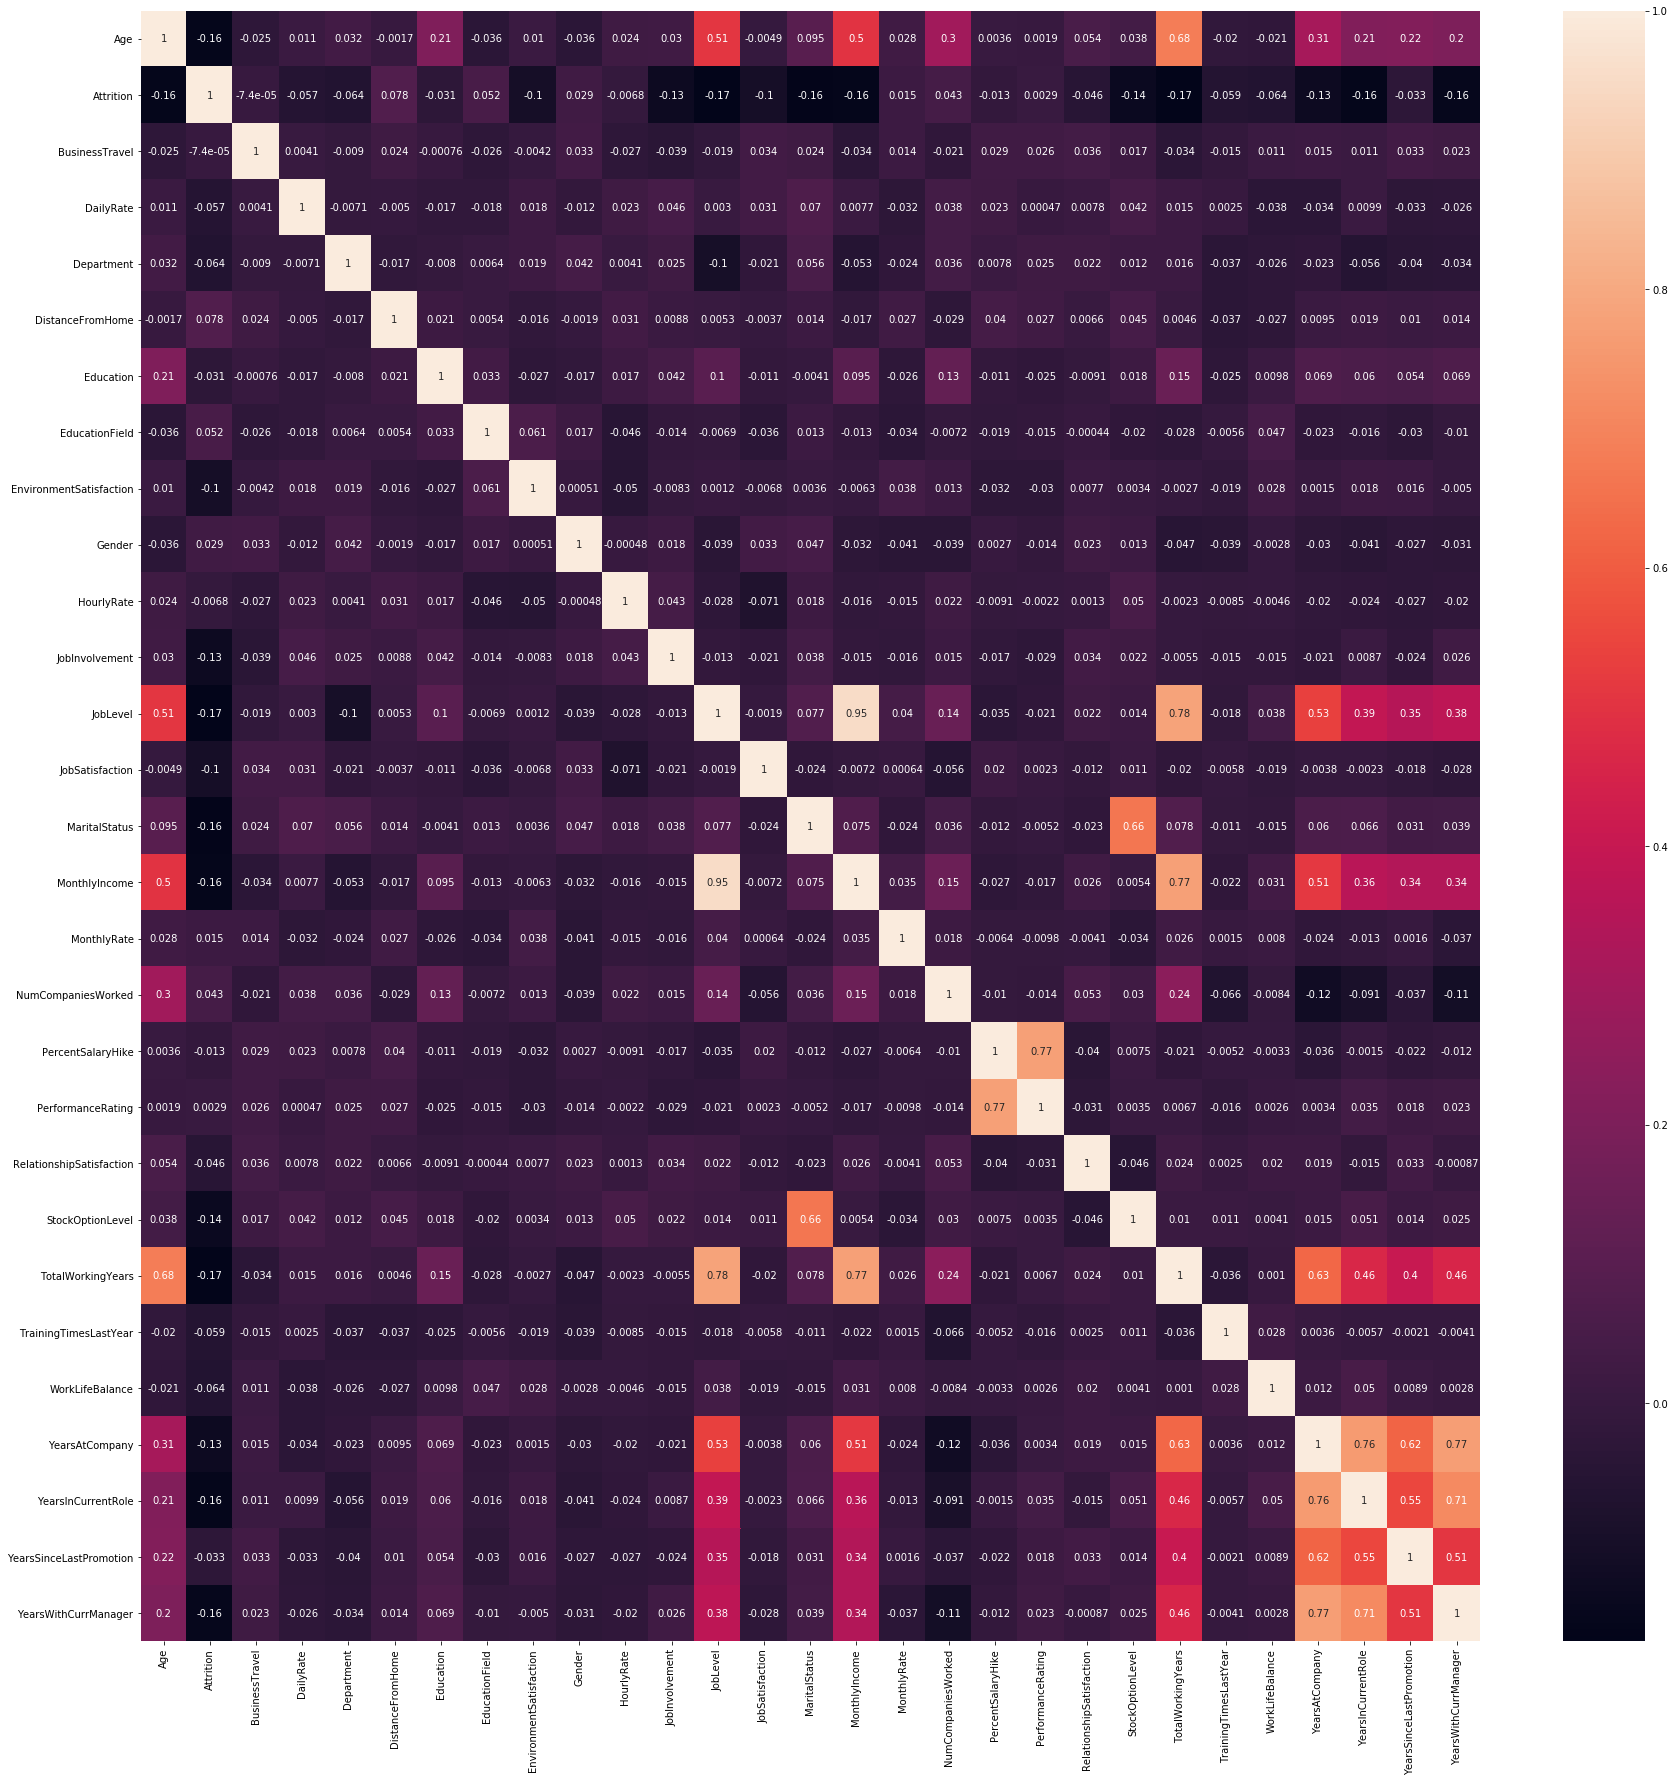

In [27]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True)

In [28]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'IncomeRange'],
      dtype='object')

In [29]:
y = df['Attrition']
X = df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [30]:
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 23)
dtc1 = DecisionTreeClassifier(criterion = 'entropy')
dtc1.fit(X_train,y_train)
#y_pred = dtc1_predict(X_test)
print("Training Score", dtc1.score(X_train,y_train))
print("Testing Score", dtc1.score(X_test,y_test))

Training Score 1.0
Testing Score 0.7608695652173914


In [32]:
cnf_matrix = metrics.confusion_matrix(y_test, dtc1.predict(X_test))
cnf_matrix

array([[260,  48],
       [ 40,  20]], dtype=int64)

In [33]:
export_graphviz(dtc1,feature_names=X.columns, out_file="tree.dot",
               filled = True, rounded = True,
               special_characters = True)

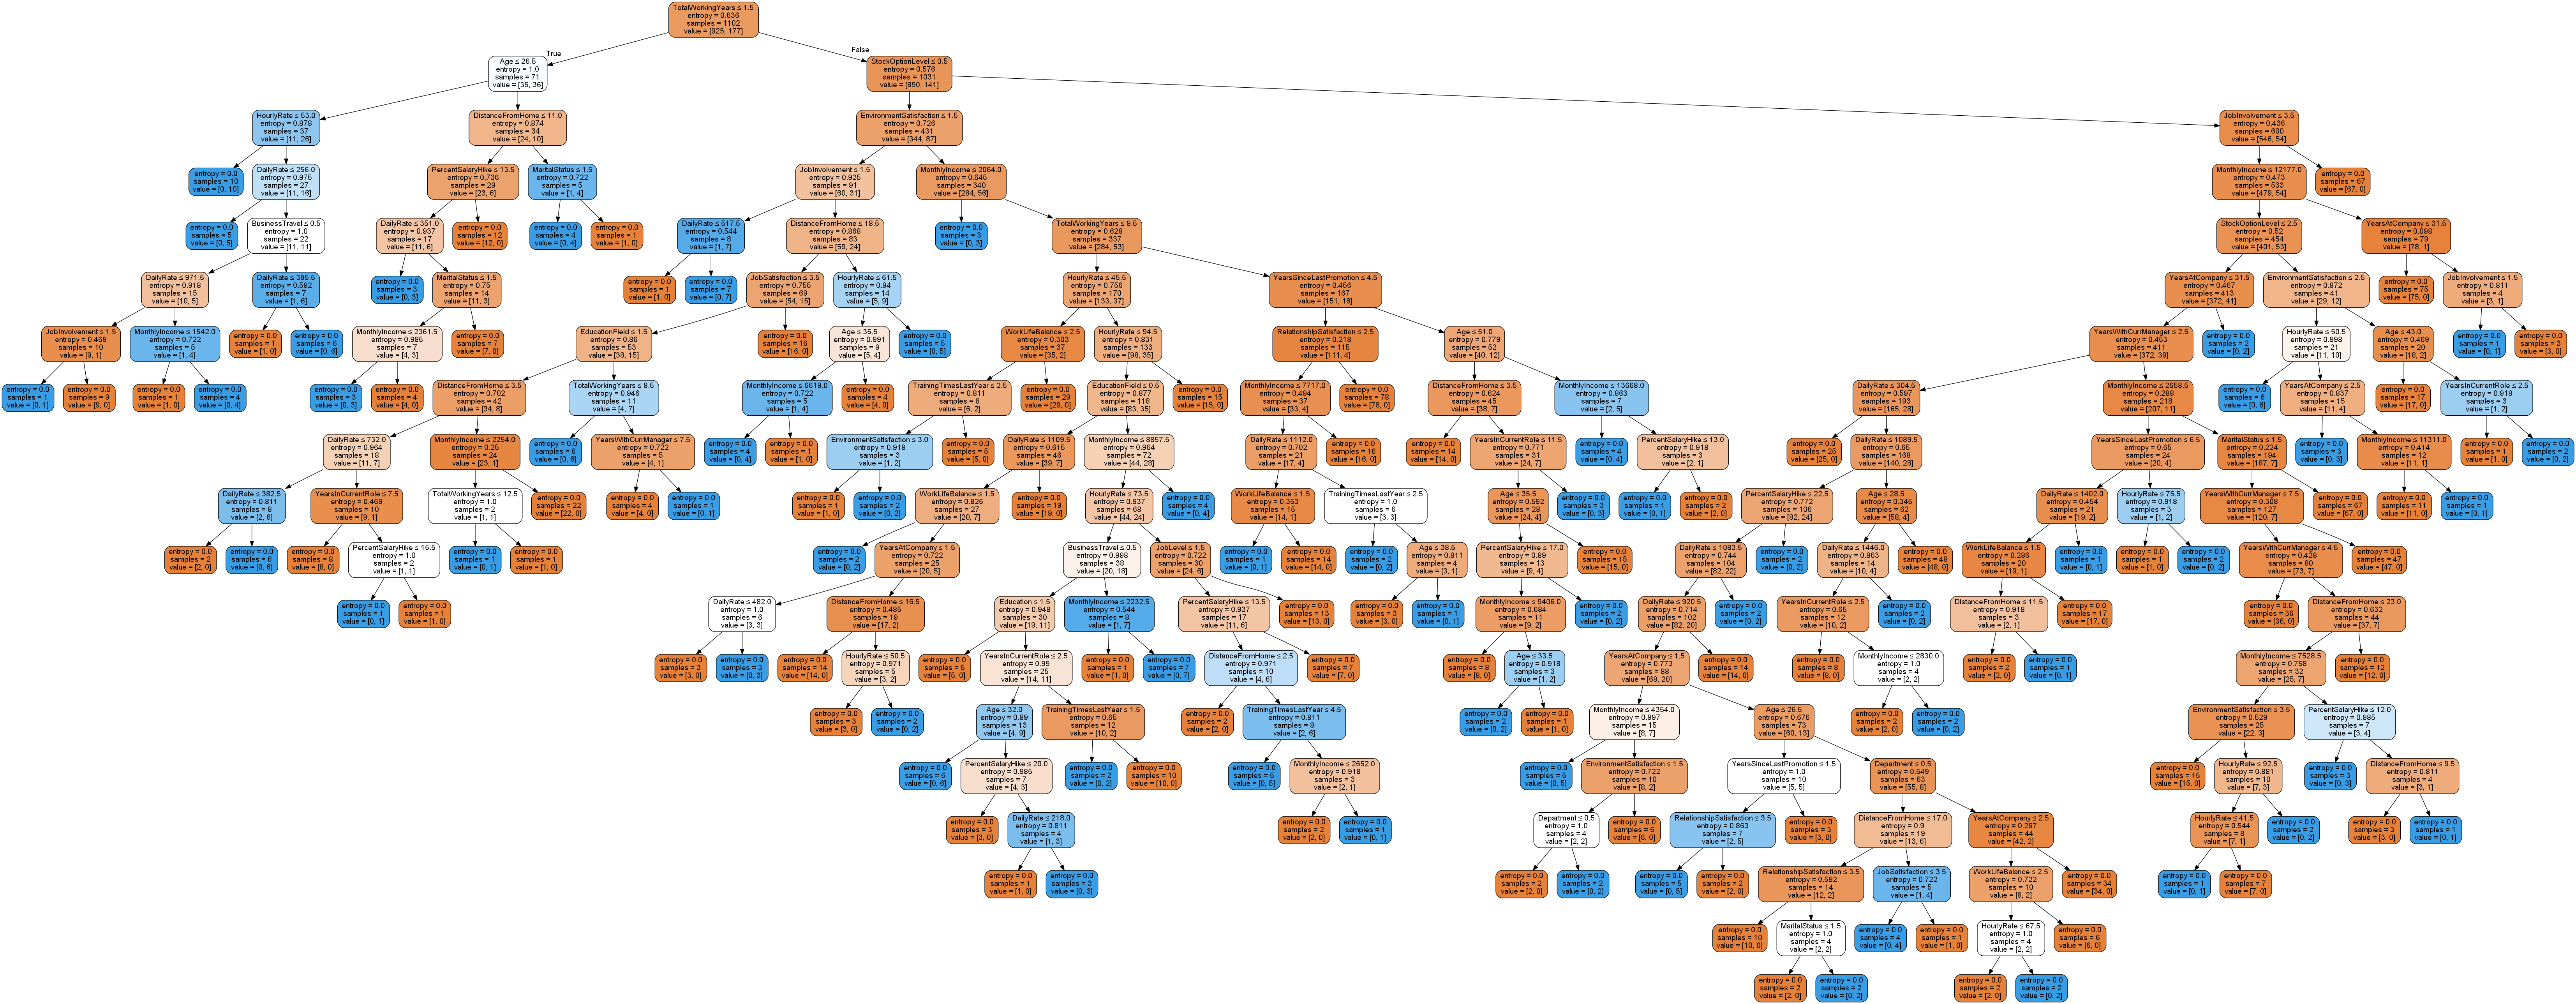

In [34]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtc1, feature_names = X.columns, out_file=dot_data,
               filled = True, rounded = True,
               special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [35]:
from sklearn import svm

In [36]:
y = df['Attrition']
X = df[['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state =23)

In [38]:
clfsvm = svm.SVC()
clfsvm.fit(X_train,y_train)

C:\Users\Ajay Sahu\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
accuracy = clfsvm.score(X_test,y_test)
accuracy

0.8369565217391305

In [40]:
cnf_matrix = metrics.confusion_matrix(y_test, clfsvm.predict(X_test))
cnf_matrix

array([[308,   0],
       [ 60,   0]], dtype=int64)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=23)

In [46]:
LogModel = LogisticRegression()
LogModel.fit(X_train,y_train)
y_predict = LogModel.predict(X_test)

C:\Users\Ajay Sahu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [47]:
LogModel.score(X_test, y_test)

0.8396739130434783

In [48]:
cnf_matrix = metrics.confusion_matrix(y_test, LogModel.predict(X_test))
cnf_matrix

array([[306,   2],
       [ 57,   3]], dtype=int64)